In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
import tweepy

In [ ]:
# Load the dataset correctly
df = pd.read_csv('/content/drive/MyDrive/disaster_tweet.csv')

#Dataset Exploration

Dataset Overview:
   id keyword        location  \
0   0  ablaze             NaN   
1   1  ablaze             NaN   
2   2  ablaze   New York City   
3   3  ablaze  Morgantown, WV   
4   4  ablaze             NaN   

                                                text  target  
0  Communal violence in Bhainsa, Telangana. "Ston...       1  
1  Telangana: Section 144 has been imposed in Bha...       1  
2  Arsonist sets cars ablaze at dealership https:...       1  
3  Arsonist sets cars ablaze at dealership https:...       1  
4  "Lord Jesus, your love brings freedom and pard...       0  


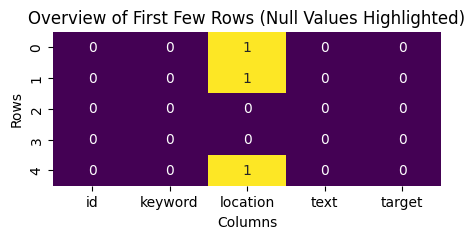

In [ ]:
print("Dataset Overview:")
# Displaying the first rows of dataset
print(df.head())
# Visualize the first few rows of the dataset using a table plot
plt.figure(figsize=(5, 2))
sns.heatmap(df.head().isnull(), cbar=False, cmap='viridis', annot=True)
plt.title('Overview of First Few Rows (Null Values Highlighted)')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


 Data Preprocessing & Applying preprocessing to tweet text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


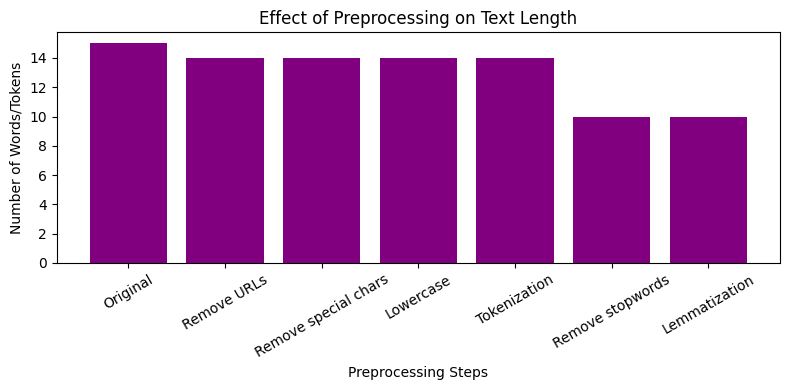

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing steps
def preprocess_text(text):
    steps = []

    # Original length
    steps.append(('Original', len(text.split())))

    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    steps.append(('Remove URLs', len(text.split())))

    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    steps.append(('Remove special chars', len(text.split())))

    # Convert to lowercase
    text = text.lower()
    steps.append(('Lowercase', len(text.split())))

    # Tokenization
    tokens = word_tokenize(text)
    steps.append(('Tokenization', len(tokens)))

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    steps.append(('Remove stopwords', len(tokens)))

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    steps.append(('Lemmatization', len(tokens)))

    # Return the final text and step details
    return ' '.join(tokens), steps
    # Sample text
text = "Natural disasters like floods, earthquakes, and wildfires can cause significant damage. Learn more at http://disasterresponse.com"

# Preprocess text
processed_text, steps = preprocess_text(text)

# Plot the bar graph
labels, counts = zip(*steps)
plt.figure(figsize=(8, 4))
plt.bar(labels, counts, color='Purple')
plt.xlabel('Preprocessing Steps')
plt.ylabel('Number of Words/Tokens')
plt.title('Effect of Preprocessing on Text Length')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


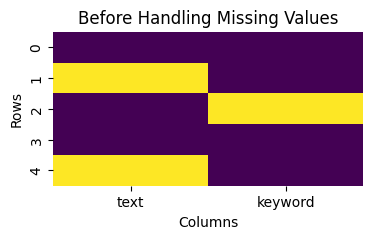

<ipython-input-61-ebf73708bdc9>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['keyword'].fillna('unknown', inplace=True)


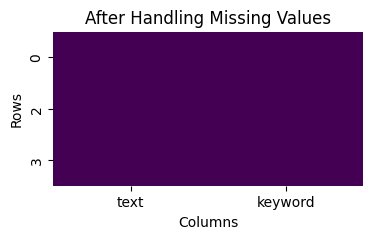

In [ ]:
# Sample DataFrame
data = {
    'text': ['Sample text', np.nan, 'Another text', 'More text', np.nan],
    'keyword': ['keyword1', 'keyword2', np.nan, 'keyword4', 'keyword5']
}
df = pd.DataFrame(data)

# Function to visualize missing values
def visualize_missing(df, title):
    plt.figure(figsize=(4, 2))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title(title)
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

# Visualize before handling missing values
visualize_missing(df, 'Before Handling Missing Values')

# Handle missing values
df.dropna(subset=['text'], inplace=True)
df['keyword'].fillna('unknown', inplace=True)

# Visualize after handling missing values
visualize_missing(df, 'After Handling Missing Values')

Exploratory Data Analysis

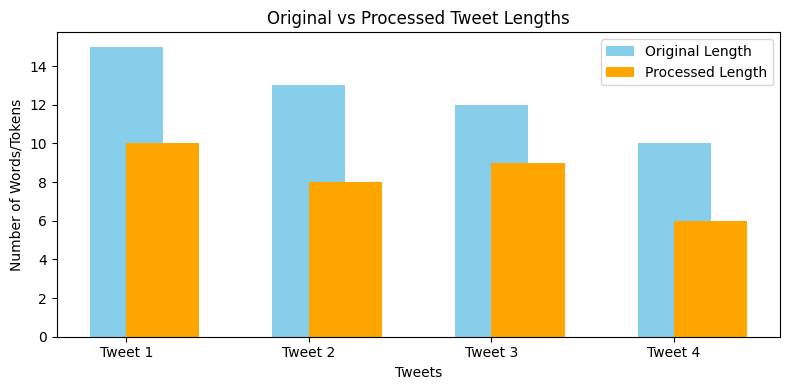

In [ ]:
# Sample DataFrame with tweet text
data = {'text': ["Natural disasters like floods, earthquakes, and wildfires can cause significant damage. Learn more at http://disasterresponse.com",
                 "The earthquake in City A has left thousands homeless and destroyed many homes.",
                 "Floods have devastated the coastal region, leaving residents stranded and without power.",
                 "Wildfires are rapidly spreading in the forest, evacuations are underway!"]}
df = pd.DataFrame(data)

# Lists to store original and processed lengths
original_lengths = []
processed_lengths = []

# Apply preprocessing and store lengths
if 'text' in df.columns:
    for text in df['text']:
        original_lengths.append(len(text.split()))  # Number of words before preprocessing
        processed_text, processed_len = preprocess_text(text)  # Preprocess and get processed length
        processed_lengths.append(processed_len)
        df['processed_text'] = df['text'].apply(lambda x: preprocess_text(x)[0])  # Store processed text
else:
    print("Error: 'text' column not found in the DataFrame.")

# Remove duplicates (using 'text' column)
if 'text' in df.columns:
    df.drop_duplicates(subset=['text'], inplace=True)
else:
    print("Error: 'text' column not found for removing duplicates.")

# Plot the comparison
labels = ['Tweet 1', 'Tweet 2', 'Tweet 3', 'Tweet 4']  # Labels for the tweets
x = range(len(df))  # Number of tweets

plt.figure(figsize=(8, 4))
plt.bar(x, original_lengths, width=0.4, label='Original Length', align='center', color='skyblue')
plt.bar(x, processed_lengths, width=0.4, label='Processed Length', align='edge', color='orange')

plt.xlabel('Tweets')
plt.ylabel('Number of Words/Tokens')
plt.title('Original vs Processed Tweet Lengths')
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()
plt.show()


1. Tweet volume over time

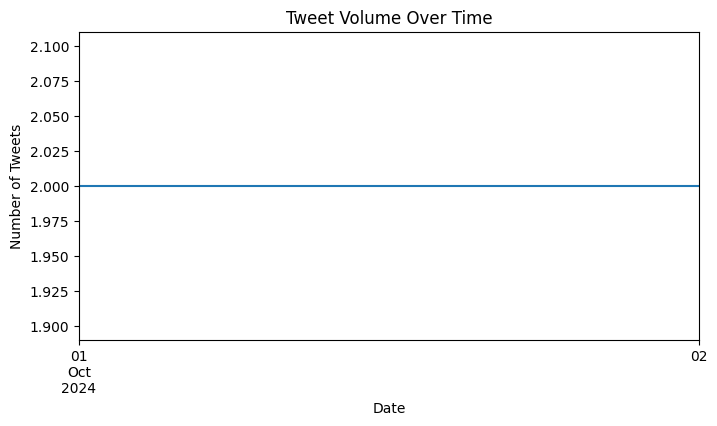

In [ ]:

# Sample DataFrame with a timestamp column (use your actual DataFrame here)
data = {'created_at': ["2024-10-01 12:34:00", "2024-10-01 13:01:00", "2024-10-02 08:21:00", "2024-10-02 09:45:00"]}
df = pd.DataFrame(data)

# Check column name (assuming it's 'created_at' instead of 'timestamp')
df['timestamp'] = pd.to_datetime(df['created_at'])

# Resample and plot tweet counts over time
tweet_counts = df.resample('D', on='timestamp').size()

plt.figure(figsize=(8, 4))
tweet_counts.plot()
plt.title('Tweet Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')

# Save and display the plot
plt.savefig('tweet_volume.png')
plt.show()  # Display the figure


2.User Types

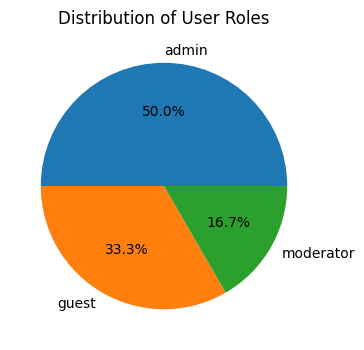

In [ ]:
# Sample DataFrame with a 'user_role' column
data = {'user_role': ['admin', 'guest', 'admin', 'moderator', 'guest', 'admin']}
df = pd.DataFrame(data)

# Calculate value counts for user roles
user_types = df['user_role'].value_counts()

# Plot pie chart of user types
plt.figure(figsize=(4, 4))
plt.pie(user_types.values, labels=user_types.index, autopct='%1.1f%%')
plt.title('Distribution of User Roles')
plt.savefig('user_types.png')
plt.show()


3. Most common hashtags

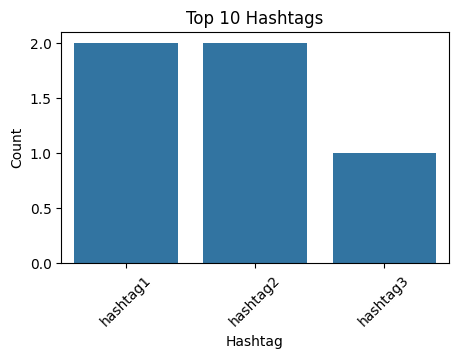

In [ ]:
# Sample DataFrame (use your actual DataFrame here)
data = {'text': [
    "This is a tweet with #hashtag1 and #hashtag2",
    "Another tweet with #hashtag2 and #hashtag3",
    "Tweet without hashtags",
    "Tweet with #hashtag1 only"
]}
df = pd.DataFrame(data)

# Function to extract hashtags
def extract_hashtags(text):
    return re.findall(r'#(\w+)', text)

# Extract all hashtags from the DataFrame
all_hashtags = [hashtag for text in df['text'] for hashtag in extract_hashtags(text)]

# Get the top 10 hashtags
top_hashtags = Counter(all_hashtags).most_common(10)

# Plot the top 10 hashtags
plt.figure(figsize=(5, 3))
sns.barplot(x=[tag for tag, count in top_hashtags], y=[count for tag, count in top_hashtags])
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('top_hashtags.png')
plt.show()


4. Tweet length distribution

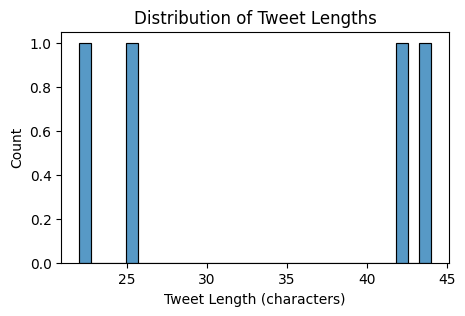

In [ ]:
# Assuming 'text' is the correct column for tweets
df['tweet_length'] = df['text'].str.len()

plt.figure(figsize=(5, 3))
sns.histplot(df['tweet_length'], bins=30)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Count')

# Save and display the plot
plt.savefig('tweet_length_distribution.png')
plt.show()  # Display the figure
plt.close()


5. Word cloud of most common words


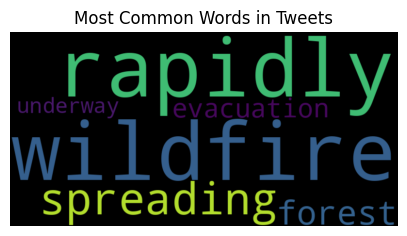

Dataset Summary:


In [ ]:
!pip install wordcloud

df['processed_text'] = processed_text
all_words = ' '.join(df['processed_text']) # Join the values in the 'processed_text' column
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_words)

plt.figure(figsize=(5, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Tweets')
plt.savefig('word_cloud.png')
plt.show()
plt.close()
# Print summary statistics
print("Dataset Summary:")

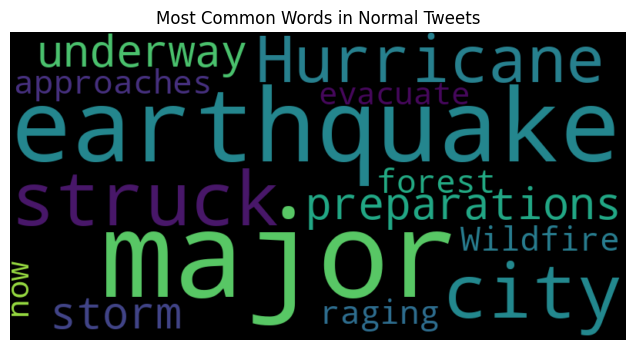

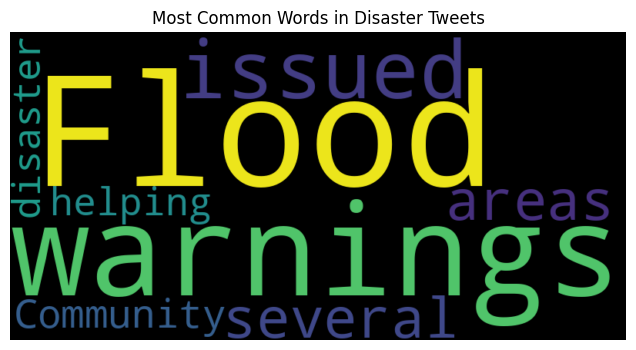

Dataset Summary:
Total Tweets: 5
Normal Tweets: 3
Disaster Tweets: 2


In [ ]:
# Assuming df is your DataFrame and 'processed_text' contains preprocessed tweets
# Sample DataFrame setup (replace this with your actual DataFrame)
data = {
    'processed_text': [ "A major earthquake has struck the city.",
        "Flood warnings have been issued in several areas.",
        "Hurricane preparations are underway as the storm approaches.",
        "Community helping each other after the disaster.",
        "Wildfire raging in the forest, evacuate now!"
   ],
    'is_disaster': [0, 1, 0, 1, 0]  # 0 for normal, 1 for disaster
}
df = pd.DataFrame(data)

# Separate normal and disaster tweets
normal_tweets = df[df['is_disaster'] == 0]
disaster_tweets = df[df['is_disaster'] == 1]

# Function to generate and display word cloud
def generate_wordcloud(data, title):
    all_words = ' '.join(data['processed_text'])  # Join the values in the 'processed_text' column
    wordcloud = WordCloud(width=800, height=400, background_color='Black').generate(all_words)

    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()  # Display the word cloud

# Generate word clouds for both normal and disaster tweets
generate_wordcloud(normal_tweets, 'Most Common Words in Normal Tweets')
generate_wordcloud(disaster_tweets, 'Most Common Words in Disaster Tweets')

# Print summary statistics
print("Dataset Summary:")
print(f"Total Tweets: {len(df)}")
print(f"Normal Tweets: {len(normal_tweets)}")
print(f"Disaster Tweets: {len(disaster_tweets)}")

Filtered non_disaster_tweet

          id  keyword                 location  \
4          4   ablaze                      NaN   
5          5   ablaze                       OC   
8          8   ablaze             Accra, Ghana   
9          9   ablaze                Searching   
11        11   ablaze                      NaN   
...      ...      ...                      ...   
11364  11364  wrecked                      NaN   
11365  11365  wrecked  Blue State in a red sea   
11366  11366  wrecked               arohaonces   
11367  11367  wrecked                       🇵🇭   
11368  11368  wrecked           auroraborealis   

                                                    text  
4      "Lord Jesus, your love brings freedom and pard...  
5      If this child was Chinese, this tweet would ha...  
8      National Security Minister, Kan Dapaah's side ...  
9      This creature who’s soul is no longer clarent ...  
11     Social media went bananas after Chuba Hubbard ...  
...                                          

<ipython-input-56-b035269b9d4c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')


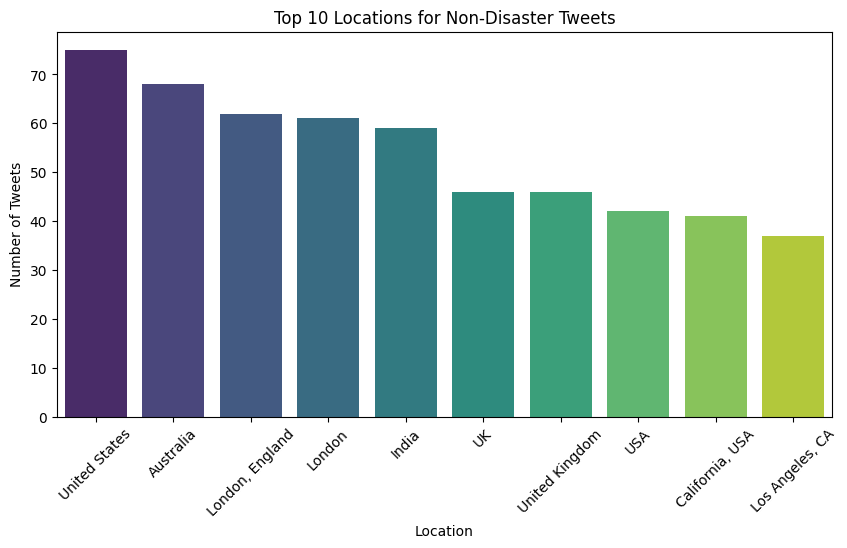

In [ ]:
# Filter tweets that are not related to disasters (target != 1)
non_disaster_tweets = df[df['target'] != 1]
print(non_disaster_tweets[['id', 'keyword', 'location', 'text']])
# Count the number of non-disaster tweets by location
location_counts = non_disaster_tweets['location'].value_counts().head(10)  # Top 10 locations
# Create a bar plot for the top 10 locations
plt.figure(figsize=(10, 5))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
plt.title('Top 10 Locations for Non-Disaster Tweets')
plt.xlabel('Location')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Filtered Disaster_tweet

          id  keyword         location  \
0          0   ablaze              NaN   
1          1   ablaze              NaN   
2          2   ablaze    New York City   
3          3   ablaze   Morgantown, WV   
6          6   ablaze  London, England   
...      ...      ...              ...   
11338  11338  wrecked          Puchong   
11354  11354  wrecked              NaN   
11355  11355  wrecked           Recife   
11359  11359  wrecked   Washington, DC   
11369  11369  wrecked              NaN   

                                                    text  
0      Communal violence in Bhainsa, Telangana. "Ston...  
1      Telangana: Section 144 has been imposed in Bha...  
2      Arsonist sets cars ablaze at dealership https:...  
3      Arsonist sets cars ablaze at dealership https:...  
6      Several houses have been set ablaze in Ngemsib...  
...                                                  ...  
11338  Kesian ular. We have wrecked their natural hab...  
11354  Yeah, proper Liv

<ipython-input-57-44a9ea85e181>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')


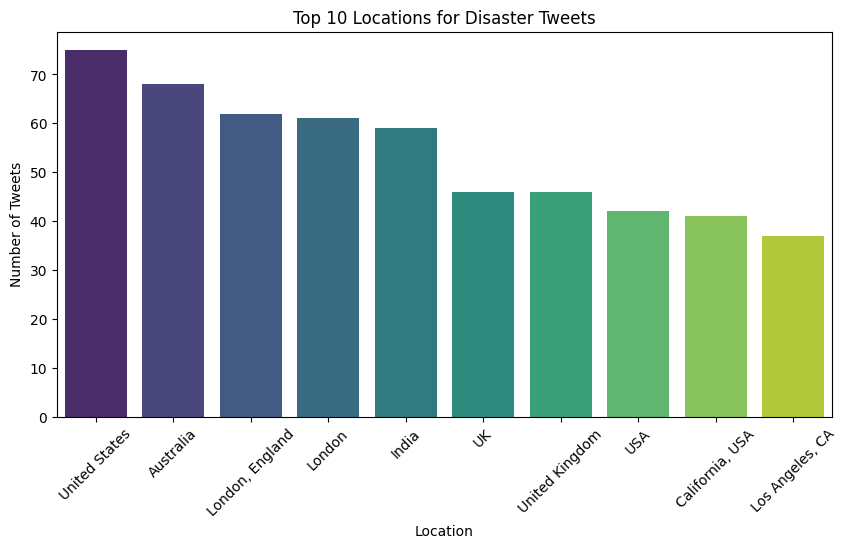

In [ ]:
# Filter tweets
disaster_tweets = df[df['target'] == 1]
print(disaster_tweets[['id', 'keyword', 'location', 'text']])
# Count the number of disaster tweets by location
location_counts = non_disaster_tweets['location'].value_counts().head(10)  # Top 10 locations
# Create a bar plot for the top 10 locations
plt.figure(figsize=(10, 5))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
plt.title('Top 10 Locations for Disaster Tweets')
plt.xlabel('Location')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

<ipython-input-58-a23b85dea113>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='text_length', data=df, palette='Set2')


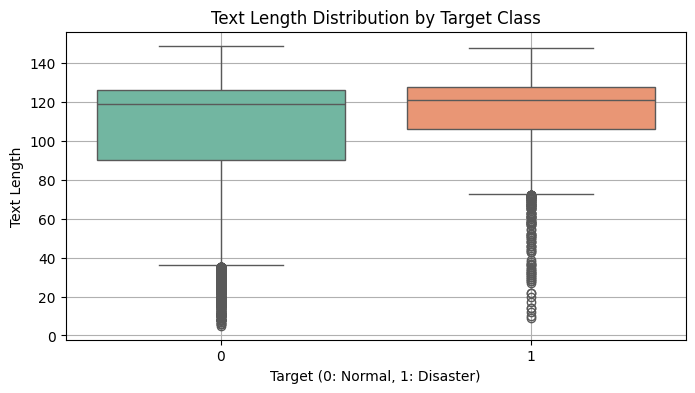

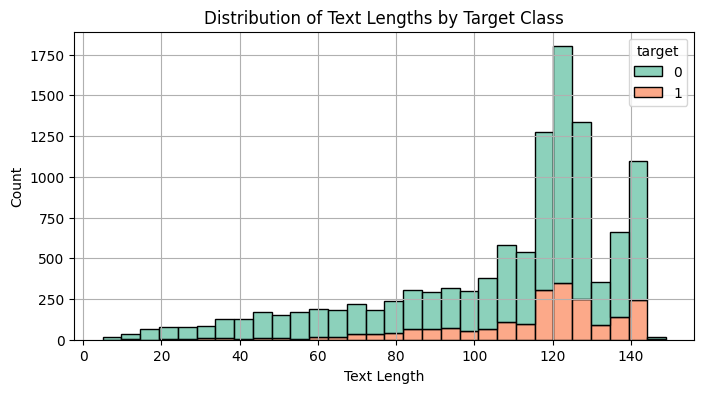

In [ ]:
# Assuming 'text_length' is already calculated and 'target' is the label for disaster/non-disaster
df['text_length'] = df['text'].apply(len)  # Calculate the text length if not already done

# Boxplot of text lengths grouped by target (disaster vs normal)
plt.figure(figsize=(8, 4))
sns.boxplot(x='target', y='text_length', data=df, palette='Set2')
plt.title('Text Length Distribution by Target Class')
plt.xlabel('Target (0: Normal, 1: Disaster)')
plt.ylabel('Text Length')
plt.grid(True)
plt.show()

# Histogram to show distribution of text length for both target classes
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='text_length', hue='target', multiple='stack', bins=30, palette='Set2')
plt.title('Distribution of Text Lengths by Target Class')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Methodology

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import spacy
from gensim import corpora
from gensim.models import LdaMulticore
from gensim.parsing.preprocessing import STOPWORDS
!pip install vaderSentiment
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


1. Text Classification

In [ ]:
import pandas as pd

In [ ]:

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/disaster_tweet.csv')

# Print column names to verify
print("Columns in the dataset:", df.columns)

# Identify the text column (assuming it contains the word 'text' or 'tweet')
text_column = [col for col in df.columns if 'text' in col.lower() or 'tweet' in col.lower()]
if not text_column:
    raise ValueError("Could not find a column for tweet text. Please specify the correct column name.")
text_column = text_column[0]

# Identify the label column (assuming it's binary and contains words like 'relevant', 'label', or 'target')
label_column = [col for col in df.columns if col in ['relevant', 'label', 'target'] or 'class' in col.lower()]
if not label_column:
    raise ValueError("Could not find a column for relevance label. Please specify the correct column name.")
label_column = label_column[0]

# 1. Text Classification
X = df[text_column]
y = df[label_column]

# Ensure y is binary
unique_labels = y.unique()
if len(unique_labels) != 2:
    print(f"Warning: Expected binary classification, but found {len(unique_labels)} unique labels.")
    print("Unique labels:", unique_labels)
    print("Converting to binary classification (0 and 1)")
    y = (y == y.mode()[0]).astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_vec, y_train)

# Predict and evaluate
y_pred = svm_classifier.predict(X_test_vec)
print("Text Classification Report:")
print(classification_report(y_test, y_pred))

# Print some sample predictions
print("\nSample Predictions:")
for i in range(5):
    print(f"Text: {X_test.iloc[i][:100]}...")
    print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}")
    print()

Columns in the dataset: Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')
Text Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1878
           1       0.79      0.55      0.65       396

    accuracy                           0.90      2274
   macro avg       0.85      0.76      0.79      2274
weighted avg       0.89      0.90      0.89      2274


Sample Predictions:
Text: How many illegal buildings should be demolished in our city. In the Guadalajara of Enrique Alfaro, t...
Actual: 0, Predicted: 0

Text: Who’s fatality is this tho ????...
Actual: 0, Predicted: 0

Text: #OnThisDay 2018 Chinese state media confirmed that Iranian tanker SANCHI had sunk after burning for ...
Actual: 1, Predicted: 0

Text: With any luck you will miss the windstorm on either side...fly safe xxx...
Actual: 0, Predicted: 0

Text: Inferno on Black Friday 1939: 71 deaths, 3,700 buildings, too much fuel and “lit 

2. Named Entity Recognition

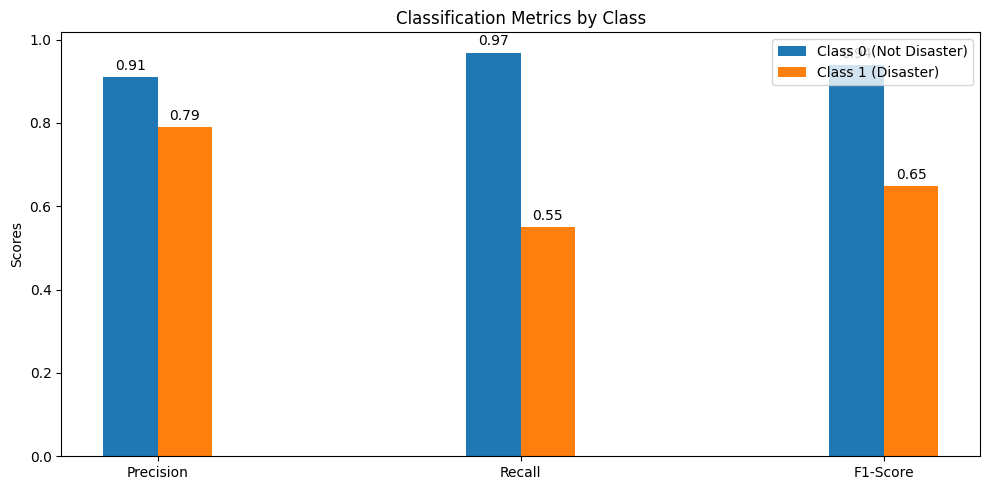

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Get precision, recall, and F1-score for each class
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

# Set up the data for plotting
metrics = ['Precision', 'Recall', 'F1-Score']
class_0 = [precision[0], recall[0], f1[0]]
class_1 = [precision[1], recall[1], f1[1]]

x = np.arange(len(metrics))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width/2, class_0, width, label='Class 0 (Not Disaster)')
rects2 = ax.bar(x + width/2, class_1, width, label='Class 1 (Disaster)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Classification Metrics by Class')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add value labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


Named Entity Recognition - Sample Results:
                                                    text  \
3495   How many illegal buildings should be demolishe...   
5461                     Who’s fatality is this tho ????   
9794   #OnThisDay 2018 Chinese state media confirmed ...   
11105  With any luck you will miss the windstorm on e...   
1803   Inferno on Black Friday 1939: 71 deaths, 3,700...   

                                                entities  
3495   [(the Guadalajara of Enrique Alfaro, FAC), (ht...  
5461                                                  []  
9794   [(#OnThisDay, MONEY), (2018, DATE), (Chinese, ...  
11105                                                 []  
1803   [(Friday 1939, DATE), (71, CARDINAL), (3,700, ...  


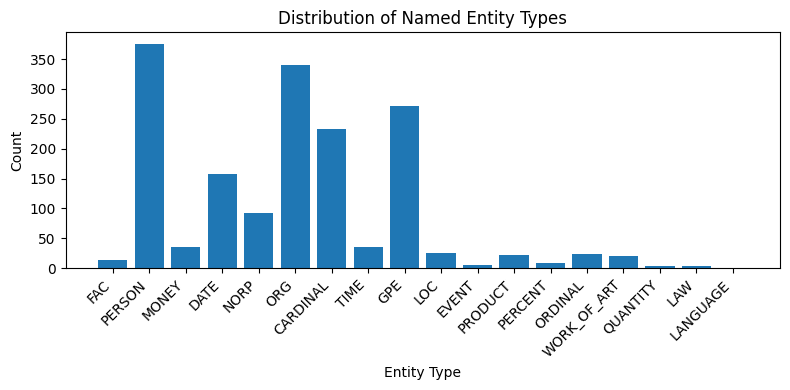

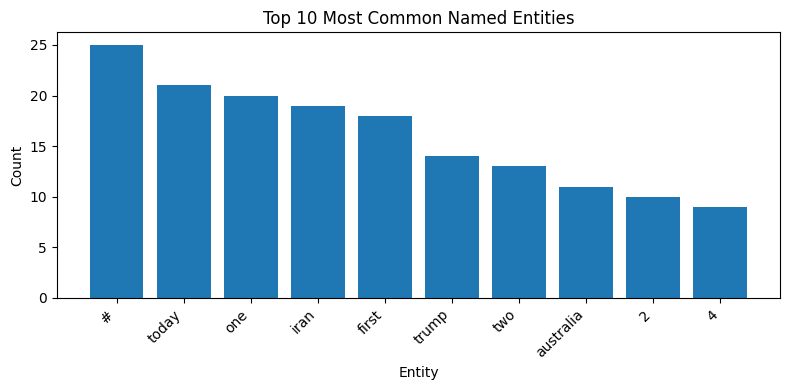

In [ ]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Apply NER to a sample of tweets (adjust sample size as needed)
sample_size = min(1000, len(df))
df_sample = df.sample(sample_size, random_state=42)
df_sample['entities'] = df_sample[text_column].apply(extract_entities)

print("\nNamed Entity Recognition - Sample Results:")
print(df_sample[[text_column, 'entities']].head())

# Count entity types
entity_types = [entity[1] for entities in df_sample['entities'] for entity in entities]
entity_counts = Counter(entity_types)

# Visualize entity types
plt.figure(figsize=(8, 4))
plt.bar(entity_counts.keys(), entity_counts.values())
plt.title('Distribution of Named Entity Types')
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize top 10 most common entities
all_entities = [entity[0].lower() for entities in df_sample['entities'] for entity in entities]
top_entities = Counter(all_entities).most_common(10)

plt.figure(figsize=(8, 4))
plt.bar([e[0] for e in top_entities], [e[1] for e in top_entities])
plt.title('Top 10 Most Common Named Entities')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

3. Topic Modeling


Topic Modeling - Top 5 Topics:
Topic 0: 0.004*"-" + 0.003*"&amp;" + 0.003*"people" + 0.003*"trauma" + 0.003*"storm" + 0.003*"suicide" + 0.003*"it's" + 0.003*"killed" + 0.002*"i'm" + 0.002*"police"
Topic 1: 0.005*"&amp;" + 0.005*"schools" + 0.003*"wrecked" + 0.003*"screaming" + 0.003*"|" + 0.003*"heart" + 0.003*"-" + 0.003*"it's" + 0.003*"suicide" + 0.003*"party"
Topic 2: 0.007*"like" + 0.006*"people" + 0.006*"-" + 0.005*"&amp;" + 0.004*"trapped" + 0.003*"i’m" + 0.003*"it’s" + 0.003*"need" + 0.003*"wounds" + 0.003*"tragedy"
Topic 3: 0.006*"like" + 0.005*"-" + 0.004*"warning" + 0.004*"&amp;" + 0.003*"weather" + 0.003*"weapon" + 0.003*"severe" + 0.003*"thunderstorm" + 0.003*"threat" + 0.003*"nuclear"
Topic 4: 0.006*"years" + 0.004*"brace" + 0.004*"people" + 0.003*"volcano" + 0.003*"heart" + 0.003*"wounded" + 0.003*"violent" + 0.003*"&amp;" + 0.003*"sunk" + 0.003*"time"


<ipython-input-34-87fefe949853>:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


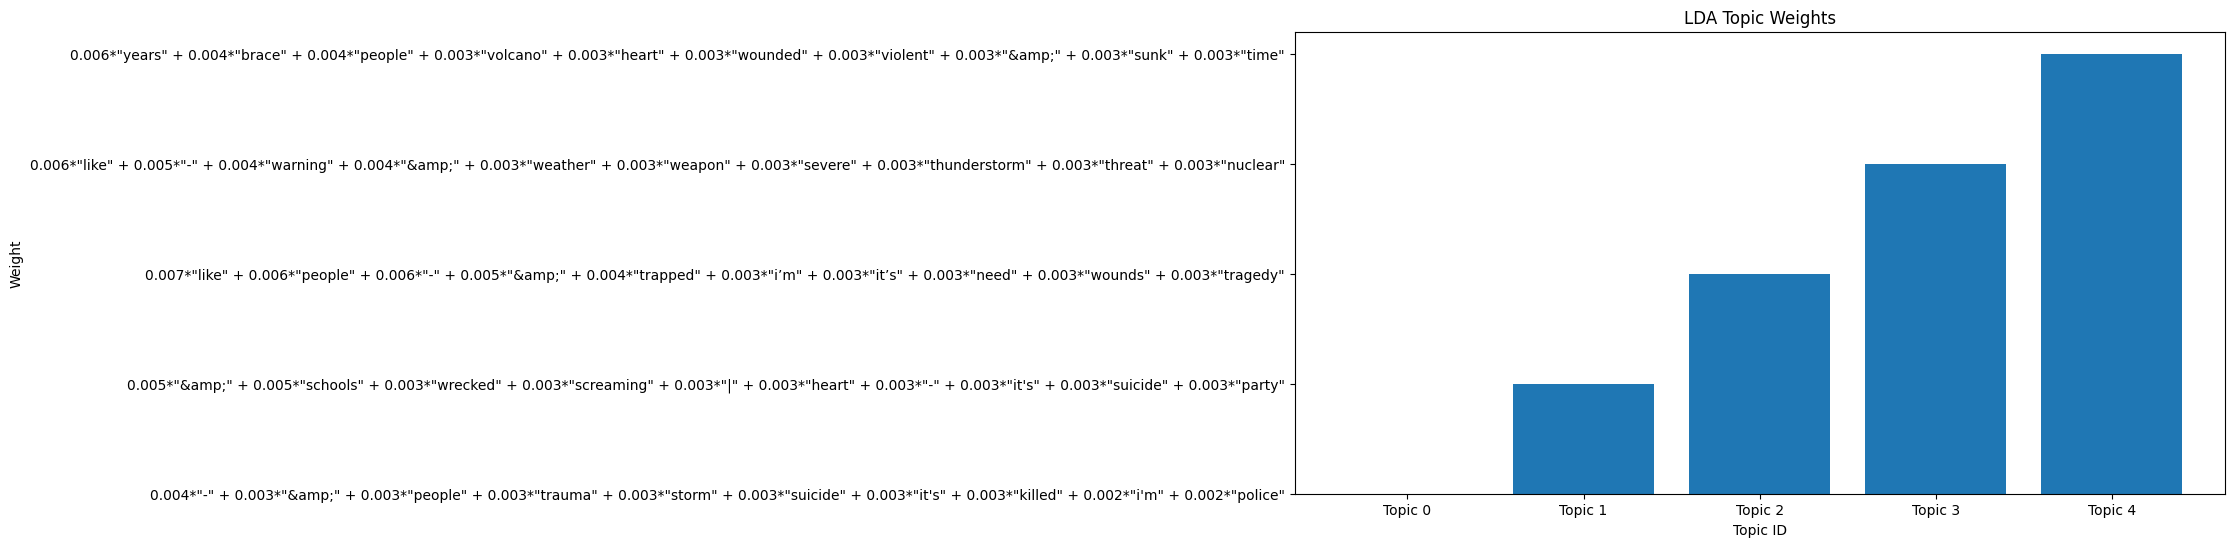

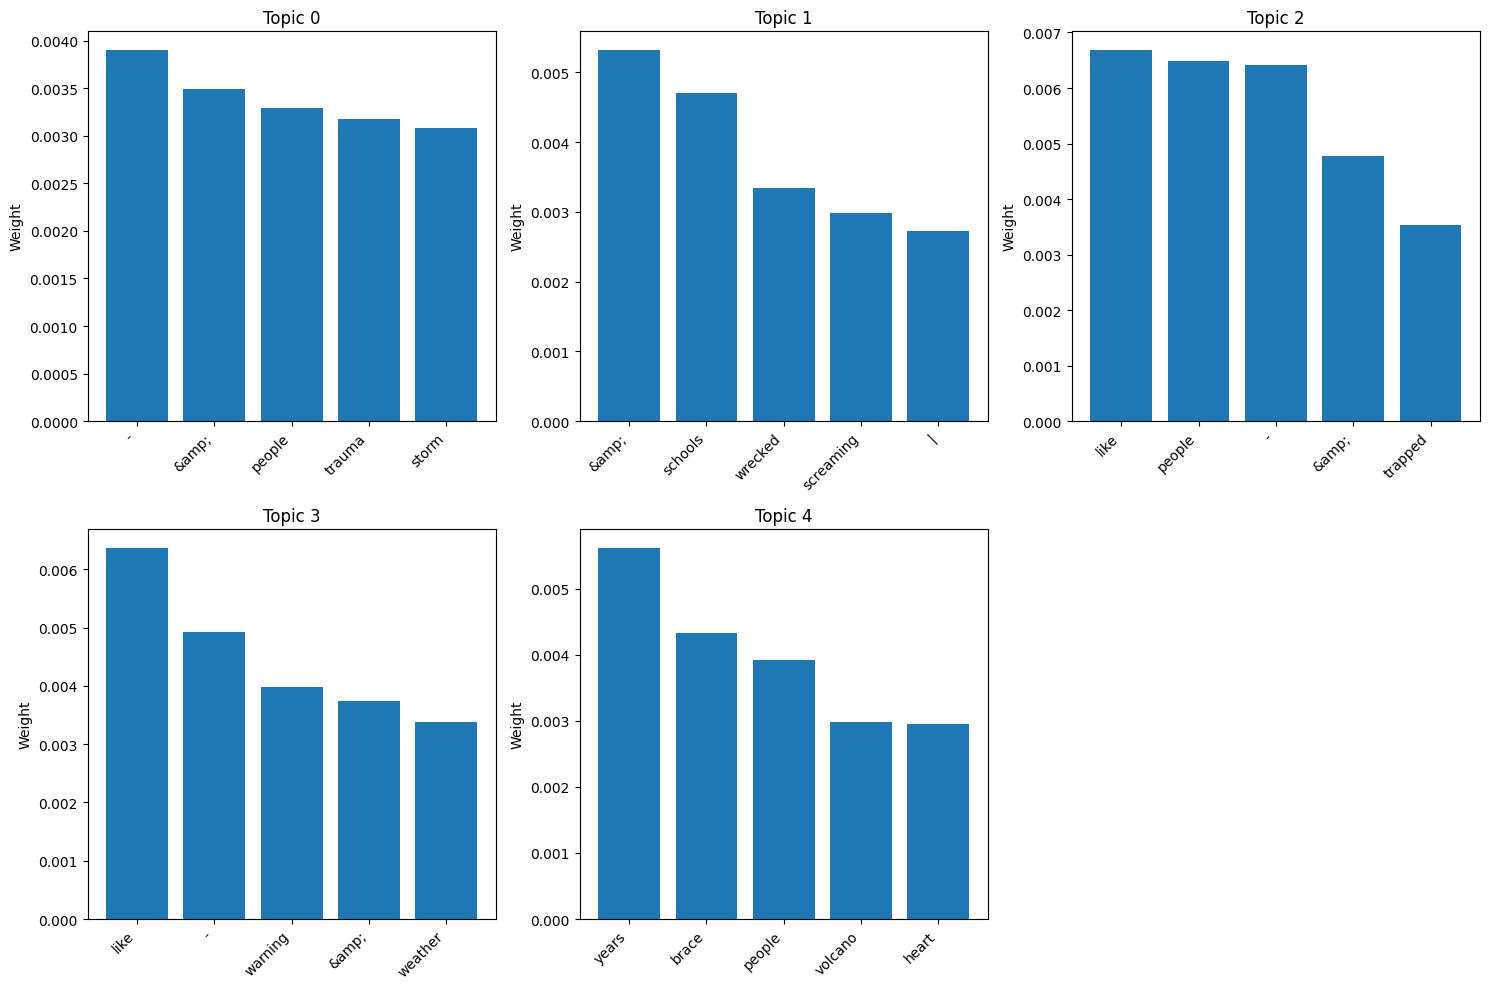

In [ ]:
def preprocess_text(text):
    tokens = text.lower().split()
    return [token for token in tokens if token not in STOPWORDS]

# Use the correct column name for the tweet text
processed_docs = df[text_column].apply(preprocess_text)
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42)

print("\nTopic Modeling - Top 5 Topics:")
topics = []
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")
    topics.append((idx, topic))

# Visualize topics
plt.figure(figsize=(12, 6))
topic_weights = [topic[1] for topic in lda_model.print_topics()]
x = range(len(topic_weights))
plt.bar(x, topic_weights)
plt.xlabel("Topic ID")
plt.ylabel("Weight")
plt.title("LDA Topic Weights")
plt.xticks(x, [f"Topic {i}" for i in range(len(topic_weights))])
plt.tight_layout()
plt.show()

# Visualize top words for each topic
def get_top_words(topic, n=5):
    return [word for word, _ in lda_model.show_topic(topic, topn=n)]

top_words = [get_top_words(topic) for topic in range(5)]

plt.figure(figsize=(15, 10))
for i, words in enumerate(top_words):
    plt.subplot(2, 3, i+1)
    plt.bar(range(len(words)), [lda_model.show_topic(i, topn=5)[j][1] for j in range(len(words))])
    plt.title(f"Topic {i}")
    plt.xticks(range(len(words)), words, rotation=45, ha='right')
    plt.ylabel("Weight")
plt.tight_layout()
plt.show()

4.Sentiment Analysis

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



Sentiment Analysis - Summary Statistics:
count    11370.000000
mean        -0.107810
std          0.450211
min         -0.958400
25%         -0.476700
50%          0.000000
75%          0.153100
max          0.943700
Name: sentiment, dtype: float64


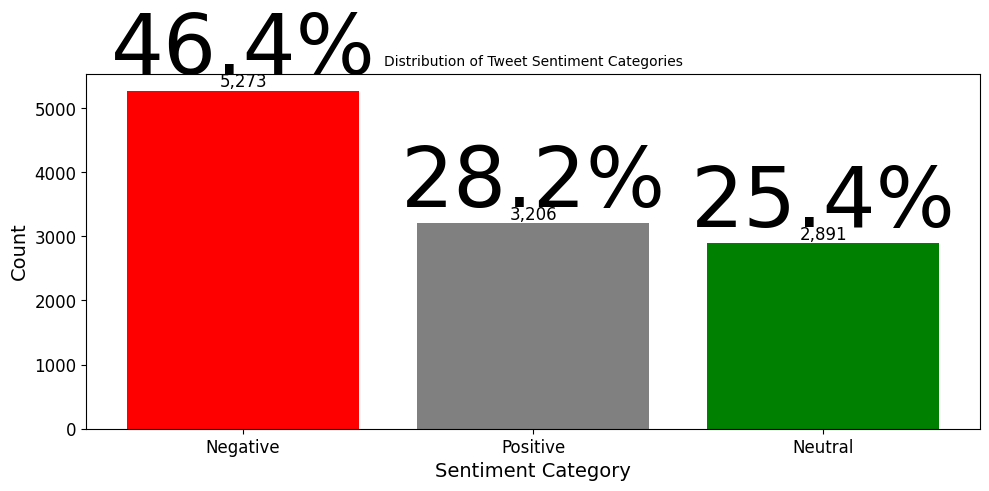


Sentiment distribution bar graph saved as 'sentiment_distribution_bar.png'

Processed data saved to 'processed_disaster_tweets.csv'


<Figure size 640x480 with 0 Axes>

In [ ]:
import nltk
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Download the necessary NLTK data
nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

# Use the correct column name for the tweet text
df['sentiment'] = df[text_column].apply(get_sentiment)

print("\nSentiment Analysis - Summary Statistics:")
print(df['sentiment'].describe())

# Categorize sentiments
def categorize_sentiment(score):
    if score <= -0.05:
        return 'Negative'
    elif score >= 0.05:
        return 'Positive'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

# Visualize sentiment categories (bar graph)
sentiment_counts = df['sentiment_category'].value_counts()

plt.figure(figsize=(10, 5))
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=['red', 'gray', 'green'])
plt.title('Distribution of Tweet Sentiment Categories', fontsize=10)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,}',
             ha='center', va='bottom', fontsize=12)

# Add percentage labels
total = sum(sentiment_counts)
for i, count in enumerate(sentiment_counts):
    percentage = count / total * 100
    plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=60, color='black')

plt.tight_layout()
plt.show()

# Save the figure
plt.savefig('sentiment_distribution_bar.png')
print("\nSentiment distribution bar graph saved as 'sentiment_distribution_bar.png'")

# Save processed data
df.to_csv('processed_disaster_tweets.csv', index=False)
print("\nProcessed data saved to 'processed_disaster_tweets.csv'")

#Feature Extraction and Representation

1. Bag of Words

Bar graph of top 20 words saved as 'top_words_frequency.png'


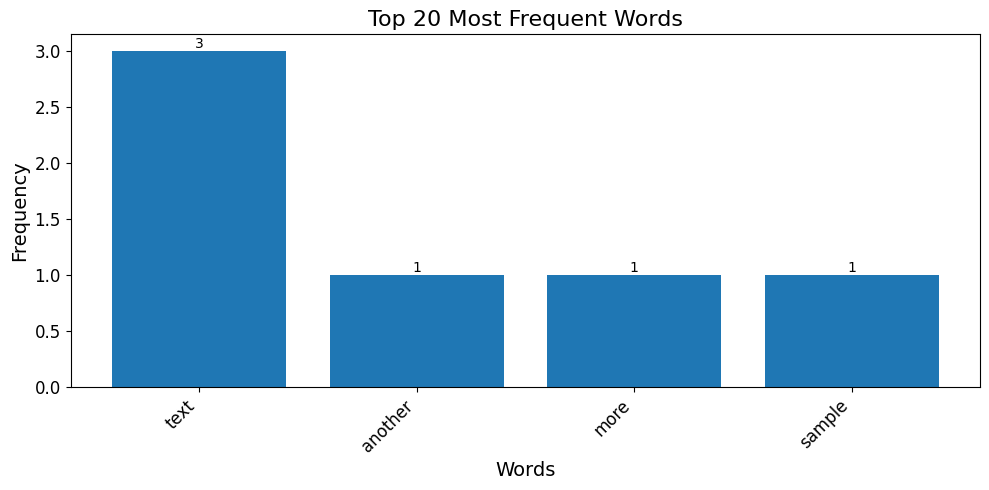


Top 20 words and their frequencies:
   term  frequency
   text          3
another          1
   more          1
 sample          1


In [111]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Assuming df and 'processed_text' column are already defined

# Apply CountVectorizer
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['processed_text'])

# Get feature names and their frequencies
feature_names = bow_vectorizer.get_feature_names_out()
word_freq = X_bow.sum(axis=0).A1  # Convert matrix to 1D array

# Create a dataframe with words and their frequencies
word_freq_df = pd.DataFrame({'term': feature_names, 'frequency': word_freq})

# Sort by frequency in descending order
word_freq_df = word_freq_df.sort_values('frequency', ascending=False)

# Plot top N words
N = 20  # Number of top words to display
plt.figure(figsize=(10, 5))
plt.bar(word_freq_df['term'][:N], word_freq_df['frequency'][:N])
plt.title(f'Top {N} Most Frequent Words', fontsize=16)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add frequency labels on top of each bar
for i, v in enumerate(word_freq_df['frequency'][:N]):
    plt.text(i, v, str(int(v)), ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Save the plot
plt.savefig('top_words_frequency.png', dpi=300, bbox_inches='tight')
print(f"Bar graph of top {N} words saved as 'top_words_frequency.png'")

# Display the plot
plt.show()

# Print top 20 words and their frequencies
print("\nTop 20 words and their frequencies:")
print(word_freq_df.head(20).to_string(index=False))

2. TF-IDF

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'keyword' is your target column based on previous runs and global variables
target_column = 'keyword'  # Replace 'keyword' with your actual target column name if different

# Print available columns for verification
print("Available columns in your dataframe:", df.columns.tolist())

# Process the text data (e.g., tokenize, remove stop words, etc.)
# Replace this with your actual text processing function
def process_text(text):
    return text.lower()

df['processed_text'] = df['text'].apply(process_text)  # Replace 'text' with your actual text column name

# Initialize BoW Vectorizer and transform the processed text
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['processed_text'])

# Initialize TF-IDF Vectorizer and transform the processed text
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_text'])

# Split the data into training and testing sets for BoW and TF-IDF
X_bow_train, X_bow_test, y_train, y_test = train_test_split(X_bow, df[target_column], test_size=0.2, random_state=42)
X_tfidf_train, X_tfidf_test, _, _ = train_test_split(X_tfidf, df[target_column], test_size=0.2, random_state=42)

# Train and evaluate SVM model with BoW features
svm_bow = SVC(kernel='linear', random_state=42)
svm_bow.fit(X_bow_train, y_train)
y_pred_bow = svm_bow.predict(X_bow_test)
print("Classification Report (BoW):")
print(classification_report(y_test, y_pred_bow, zero_division=0))  # Added zero_division to avoid warnings

# Train and evaluate SVM model with TF-IDF features
svm_tfidf = SVC(kernel='linear', random_state=42)
svm_tfidf.fit(X_tfidf_train, y_train)
y_pred_tfidf = svm_tfidf.predict(X_tfidf_test)
print("\nClassification Report (TF-IDF):")
print(classification_report(y_test, y_pred_tfidf, zero_division=0))  # Added zero_division to avoid warnings

# Function to plot top features
def plot_top_features(feature_names, feature_importance, title):
    top_n = 10
    # Convert feature_importance to a dense numpy array
    feature_importance = feature_importance.toarray()[0]  # Access the first row since it's a 1xN matrix

    top_indices = np.argsort(feature_importance)[-top_n:]
    top_features = [feature_names[i] for i in top_indices]
    top_importances = feature_importance[top_indices]

    plt.figure(figsize=(12, 6))
    plt.bar(range(top_n), top_importances, align='center')  # Corrected: 'center' instead of 'top'
    plt.yticks(range(top_n),
               top_features)  # Use top_features instead of feature_names
    plt.xlabel('Feature Importance')
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert y-axis to show most important at the top
    plt.tight_layout()

Available columns in your dataframe: ['text', 'keyword', 'processed_text']
Classification Report (BoW):
              precision    recall  f1-score   support

    keyword1       0.00      0.00      0.00       1.0
     unknown       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Classification Report (TF-IDF):
              precision    recall  f1-score   support

    keyword1       0.00      0.00      0.00       1.0
     unknown       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



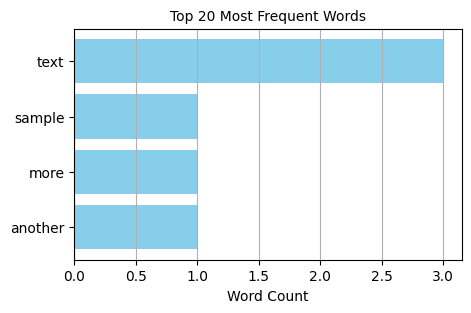

In [ ]:

# Initialize CountVectorizer - This is the crucial missing step
count_vectorizer = CountVectorizer(max_features=5000)

# Apply CountVectorizer (now using the initialized instance)
X_count = count_vectorizer.fit_transform(df['processed_text'])  # Assuming 'processed_text' is the text column

# Get feature names and their frequencies (using the count_vectorizer)
feature_names = count_vectorizer.get_feature_names_out()

word_counts = np.asarray(X_count.sum(axis=0)).flatten()
# Sort the words by their frequency
top_n = 20  # Number of top words to display
sorted_indices = word_counts.argsort()[::-1][:top_n]  # Get indices of top N words
# Get the top N words and their corresponding counts
top_words = [feature_names[i] for i in sorted_indices]
top_counts = word_counts[sorted_indices]
# Plot the top N words by frequency
plt.figure(figsize=(5, 3))
plt.barh(top_words[::-1], top_counts[::-1], color='skyblue')  # Plot in reverse order for readability
plt.xlabel('Word Count', fontsize=10)
plt.title(f'Top {top_n} Most Frequent Words', fontsize=10)
plt.grid(axis='x')
plt.show()

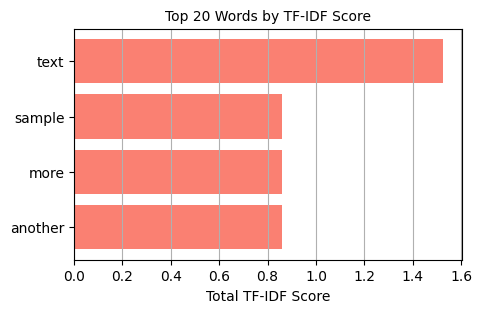

In [ ]:
# Get the feature names (words)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
# Sum up the TF-IDF scores of each feature (word) across all documents
tfidf_scores = np.asarray(X_tfidf.sum(axis=0)).flatten()
# Sort the words by their total TF-IDF score
sorted_tfidf_indices = tfidf_scores.argsort()[::-1][:top_n]
# Get the top N words and their corresponding TF-IDF scores
top_tfidf_words = [tfidf_feature_names[i] for i in sorted_tfidf_indices]
top_tfidf_scores = tfidf_scores[sorted_tfidf_indices]
# Plot the top N words by TF-IDF score
plt.figure(figsize=(5, 3))
plt.barh(top_tfidf_words[::-1], top_tfidf_scores[::-1], color='salmon')
plt.xlabel('Total TF-IDF Score', fontsize=10)
plt.title(f'Top {top_n} Words by TF-IDF Score', fontsize=10)
plt.grid(axis='x')
plt.show()

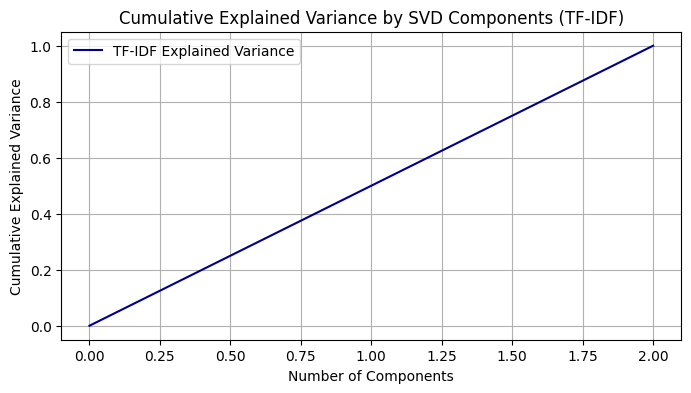

In [ ]:
# Dimensionality reduction using Truncated SVD
# Changed n_components to be less than or equal to the number of features in X_tfidf
svd = TruncatedSVD(n_components=4, random_state=22) # n_components should be <= n_features (4 in this case)

# Apply Truncated SVD to TF-IDF matrix
X_tfidf_svd = svd.fit_transform(X_tfidf)

# Explained variance ratio for TF-IDF
tfidf_explained_variance = svd.explained_variance_ratio_

# Plot the cumulative explained variance for TF-IDF
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(tfidf_explained_variance), label='TF-IDF Explained Variance', color='Darkblue')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by SVD Components (TF-IDF)')
plt.grid(True)
plt.legend()
plt.show()

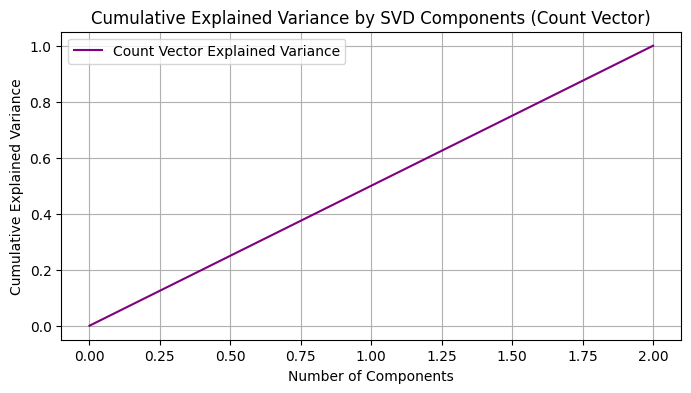

TF-IDF matrix after SVD: (3, 3)
Count matrix after SVD: (3, 3)


In [ ]:
# Apply Truncated SVD to Count matrix
X_count_svd = svd.fit_transform(X_count)

# Explained variance ratio for Count matrix
count_explained_variance = svd.explained_variance_ratio_

# Plot the cumulative explained variance for Count matrix
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(count_explained_variance), label='Count Vector Explained Variance', color='Purple')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by SVD Components (Count Vector)')
plt.grid(True)
plt.legend()
plt.show()

# Print the shape of the transformed matrices
print(f'TF-IDF matrix after SVD: {X_tfidf_svd.shape}')
print(f'Count matrix after SVD: {X_count_svd.shape}')

Sample Prediction

Text: A tree fell during the storm.
Class: Disaster Tweet

Text: Flood warnings are in effect for the area.
Class: Disaster Tweet

Text: I prefer sunny days over cloudy ones.
Class: Normal Tweet

Text: @JohnDoe Do you think the meeting will be postponed due to the weather?
Class: Normal Tweet



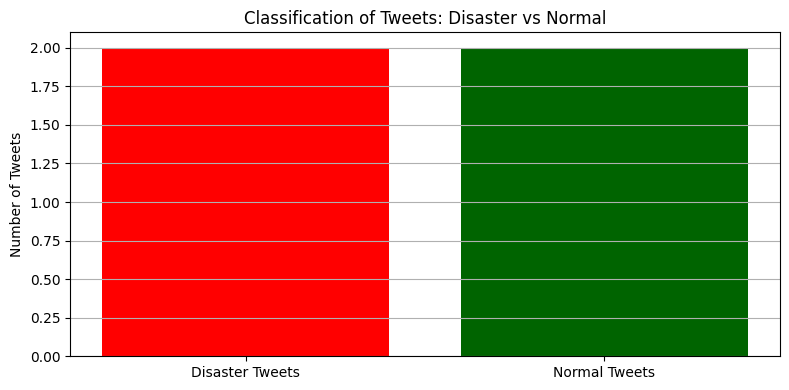

In [ ]:
# Import the necessary class from the sklearn.linear_model module
from sklearn.linear_model import PassiveAggressiveClassifier


# Example training sentences
train_sentences = [
    "A tree fell during the storm.",
    "Flood warnings are in effect for the area.",
    "I prefer sunny days over cloudy ones.",
    "@JohnDoe Do you think the meeting will be postponed due to the weather?"
]

# Initialize and fit the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))
tfidf_vectorizer.fit(train_sentences)

# Transform training sentences
tfidf_train = tfidf_vectorizer.transform(train_sentences)

# Train Passive Aggressive Classifier
# Now PassiveAggressiveClassifier is defined and accessible
pass_tf3 = PassiveAggressiveClassifier()
pass_tf3.fit(tfidf_train, [1, 1, 0, 0])  # Example labels (1 for Disaster Tweet, 0 for Normal Tweet)

# New sentences to predict
sentences = [
    "A tree fell during the storm.",
    "Flood warnings are in effect for the area.",
    "I prefer sunny days over cloudy ones.",
    "@JohnDoe Do you think the meeting will be postponed due to the weather?"
]

# Transform new sentences using the same vectorizer
tfidf_trigram = tfidf_vectorizer.transform(sentences)

# Predict using the trained Passive Aggressive Classifier
predictions = pass_tf3.predict(tfidf_trigram)

# Create lists to store texts and labels
disaster_tweets = []
normal_tweets = []

# Loop through sentences and predictions
for text, label in zip(sentences, predictions):
    if label == 1:
        disaster_tweets.append(text)  # Append disaster tweet
    else:
        normal_tweets.append(text)  # Append normal tweet

    # Print text and classification result
    print("Text:", text)
    print("Class:", "Disaster Tweet" if label == 1 else "Normal Tweet")
    print()

# Data for plotting
labels = ['Disaster Tweets', 'Normal Tweets']
sizes = [len(disaster_tweets), len(normal_tweets)]

# Plot a bar chart showing the distribution of disaster vs normal tweets
plt.figure(figsize=(8, 4))
plt.bar(labels, sizes, color=['red', 'darkgreen'])

# Add labels and title
plt.ylabel('Number of Tweets')
plt.title('Classification of Tweets: Disaster vs Normal')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()